# Interpolacja Dla zagadnienia Lagrange'a

## Generowanie wielomianów interpolacyjch oraz węzłów

### Metoda Hermite'a

In [1]:
using Plots
using Printf
using PrettyTables

function prettyprint(A)
    n, m = size(A)
    for i in 1:n
        for j in 1:m
            print(@sprintf("%10.4f", A[i,j]))
        end
        println()
    end
end

prettyprint (generic function with 1 method)

In [2]:
function CreateInterpolationHermitePolynomial(X, Y, Y′)
    n = length(X)
    d = zeros(2n, 2n)
    i = 1
    for j in 1:n
        for _ in 1:2
            d[i,1] = Y[j]
            i+=1
        end
    end
    # prettyprint(d)
    # println()
    for i in 2:2n
        if i%2 == 0
            d[i,2] = Y′[i÷2]
        else
            # println("f[$j,2] = f[$(j),1] - f[$(j-1),1] / X[$((j+1)÷2)] - X[$((j)÷2)]")
            d[i,2] = (d[i,1]- d[i-1,1])/(X[(i+1)÷2] - X[(i)÷2])
        end
    end
    # prettyprint(d)
    # println()
    for j in 3:2n
        Xi = X[(j-1)÷2]
        for i in j:2n
            # println("f[$i,$(j)] = f[$(i),$(j-1)] - f[$(i-1),$(j-1)] / X[$((i+1)÷2)] - X[$(j÷2)]")
            d[i,j] = (d[i,j-1]- d[i-1,j-1])/(X[(i+1)÷2] - X[(i+2-j)÷2])
        end
    end
    # prettyprint(d)
    # println()
    return x -> begin
        H = zeros(2n)
        prod = 1
        for i in 1:2n
            # println("H[$i] = d[$i,$i] * prod")
            H[i] = d[i,i] * prod
            # println("prod *= x - X[$((i+1)÷2)]")
            prod *= (x - X[(i+1)÷2])
        end
        return sum(H)
    end
end

# węzły interpolacji
x = [0.0, 1.0, 2.0]
# x = [-1.0, 0.0, 1.0]

# wartości funkcji i jej pochodnych
fx = [0.0, 1.0, 4.0]
# fx = [2.0, 1.0, 2]
dfx = [0.0, 2.0, 4.0]
# dfx = [-8, 0.0, 8]

# obliczenie wielomianu interpolacji Hermite'a
p = CreateInterpolationHermitePolynomial(x, fx, dfx)

# wyświetlenie wyniku
println(p(0)," ", p(1)," ", p(2)," ", p(3)," ", p(4))  # -0.0 + 0.0*x + 1.0*x^2 - 0.0*x^3

0.0 1.0 4.0 9.0 16.0


### Generacja węzłów oraz wielomianu interpolacji

In [3]:
function getEvenSpacesAndInterpolationPolynominal(A, B, func, func′, n, createFunc=CreateInterpolationHermitePolynomial)
    X = range(A, stop=B, length=n)
    return X, createFunc(X, map(func, X), map(func′, X))
end

function getCzebyszewZerosAndInterpolationPolynominal(A, B, func, func′, n, createFunc=CreateInterpolationHermitePolynomial)
    X = map((k)-> (B-A)/2*cos(((2*k-1)/2n*pi)) + (A + B)/2, 1:n)
    return X, createFunc(X, map(func, X), map(func′, X))
end

getCzebyszewZerosAndInterpolationPolynominal (generic function with 2 methods)

## Rysowanie wykresów

In [4]:
using Plots
using PrettyTables

function drawInterpolation(X, func, interpolationFunc, title="" , accuracy=10e-4)
    minVal, maxVal = extrema(X)
    len = maxVal - minVal
    x = minVal:(len)*accuracy:maxVal
    plot(x, func, label="f(x)", width=1.5)
    plot!(x, interpolationFunc, label="interpolacja")
    plot!(X, map(func, X), seriestype=:scatter, label="węzły")
    title!(title)
end

function drawInterpolationN(func, func′, nodesNumers, A, B; getNodesFunc = getCzebyszewZerosAndInterpolationPolynominal,
     creationFunc = CreateInterpolationHermitePolynomial,title="" , accuracy=10e-4)
    len =  B - A
    x = A:(len)*accuracy:B
    plot(x, func, label="f(x)", width=1.5)
    for n in nodesNumers
        X, interpolationFunc = getNodesFunc(A, B, func, func′, n, creationFunc)
        plot!(x, interpolationFunc, label="interpolacja n=$n")
        plot!(X, map(func, X), seriestype=:scatter, label="węzły  n=$n")
    end
    title!(title)
end

function addInterpolationToPlot(func, func′, n, A, B, labelInterpolation="interpolacja n=$n",labelNodes="węzły n=$n"
    , getNodesFunc = getCzebyszewZerosAndInterpolationPolynominal, creationFunc = CreateInterpolationHermitePolynomial)
    X, interpolationFunc = getNodesFunc(A, B, func, func′, n, creationFunc)
    plot!(x, interpolationFunc, label=labelInterpolation)
    plot!(X, map(func, X), seriestype=:scatter, label=labelNodes)
end

addInterpolationToPlot (generic function with 5 methods)

## Funkcja przyzielona na zajciach

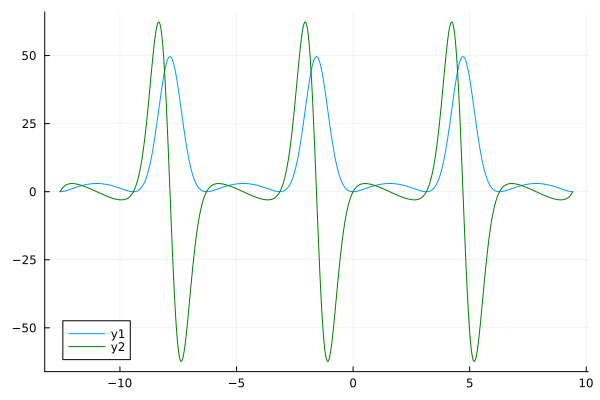

In [5]:
k = 4
m = 1
A = -4*pi
B = 3*pi
my_func = (x) -> exp(-k*sin(m*x)) + k*sin(m*x) - 1
my_derivate = (x) -> (exp(-k*sin(m*x))*(-k*m*cos(m*x)) + k*m*cos(m*x))
xs = -4*pi:0.01:3*pi

plot(xs, my_func)
# my_derivate(7)
plot!(xs, my_derivate, lc="green")

Z wykresu wynika, że:

Funkcja osiąga minimum lokalne w punkcie $x = \frac{3\pi}{2}$ i maksimum lokalne w punkcie $x = -\frac{3\pi}{2}$.
Maksymalna wartość funkcji na przedziale $[A, B]$ wynosi $f(-\frac{3\pi}{2}) = 15$.
Minimalna wartość funkcji na przedziale $[A, B]$ wynosi $f(\frac{3\pi}{2}) = -1$.
Pochodna przyjmuje wartość $+\infty$ w punktach $x = \frac{n\pi}{m}$, gdzie $n \in \mathbb{Z}$ oraz $x = -\frac{\pi}{2} + \frac{n\pi}{m}$, gdzie $n \in \mathbb{Z}$.
Pochodna przyjmuje wartość $-\infty$ w punktach $x = \frac{\pi}{2} + \frac{n\pi}{m}$, gdzie $n \in \mathbb{Z}$.

### Wykresy

#### Równe Odstępy

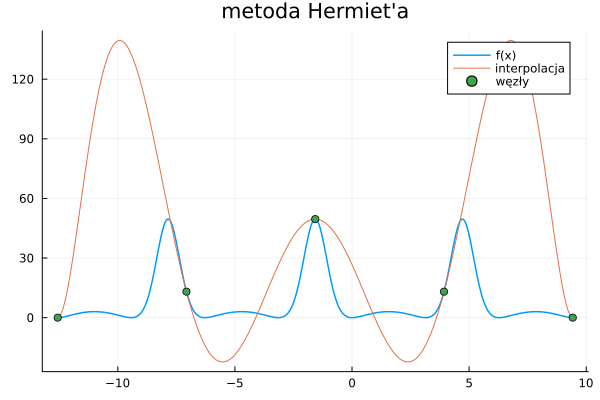

In [45]:
f = my_func
f′ = my_derivate
n = 5
# X, intF = getCzebyszewZerosAndInterpolationPolynominal(A, B, f, f′, n) 
X, intF = getEvenSpacesAndInterpolationPolynominal(A, B, f, f′, n) 
drawInterpolation(X, f, intF, "metoda Hermiet'a")
# savefig("plots/HerEvSpa$n")

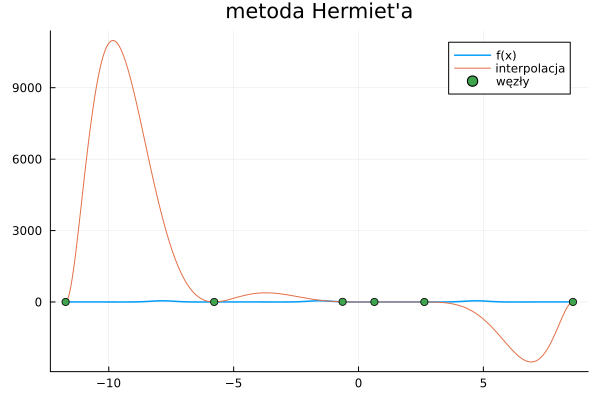

In [7]:
#węzły w których f′(x) = int

function getCzebyszewZerosAndInterpolationPolynominal2(A, B, func, func′, n, createFunc=CreateInterpolationHermitePolynomial)
    X = map((k)-> (B-A)/2*cos(((2*k-1)/2n*pi)) + (A + B)/2, 1:n)
    append!(X, π\2)
    append!(X, -π\2)
    return X, createFunc(X, map(func, X), map(func′, X))
end

f = my_func
f′ = my_derivate
n = 4
X,intF = getCzebyszewZerosAndInterpolationPolynominal2(A, B, f, f′, n) 
# X, intF = getEvenSpacesAndInterpolationPolynominal(A, B, f, f′, n) 

drawInterpolation(X, f, intF, "metoda Hermiet'a")
# savefig("plots/HerFirstBad")

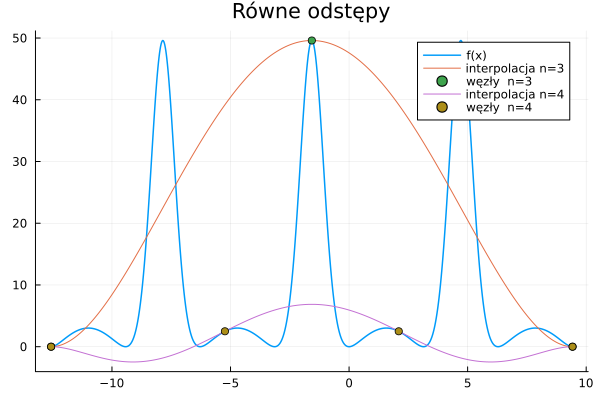

In [8]:
drawInterpolationN(my_func, my_derivate, [3, 4], A, B; getNodesFunc = getEvenSpacesAndInterpolationPolynominal, title="Równe odstępy")

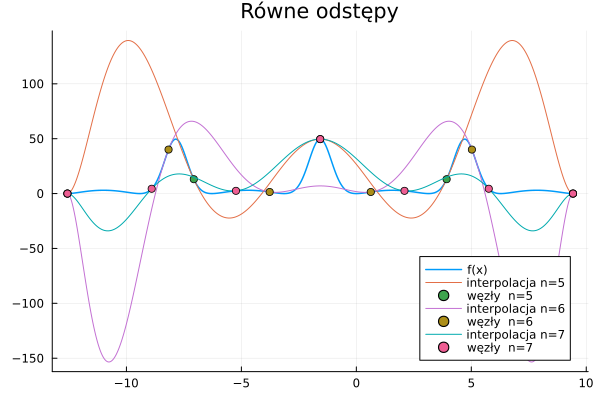

In [9]:
drawInterpolationN(my_func, my_derivate, [5, 6, 7], A, B; getNodesFunc = getEvenSpacesAndInterpolationPolynominal, title="Równe odstępy")

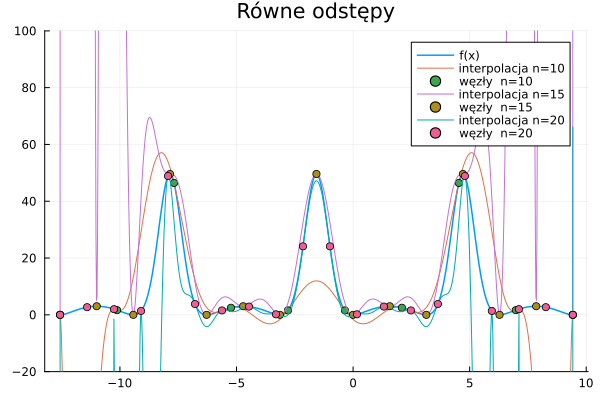

In [10]:
drawInterpolationN(my_func, my_derivate, [10, 15, 20], A, B; getNodesFunc = getEvenSpacesAndInterpolationPolynominal, title="Równe odstępy")
ylims!((-20, 100))

#### Zera Czebyszewa

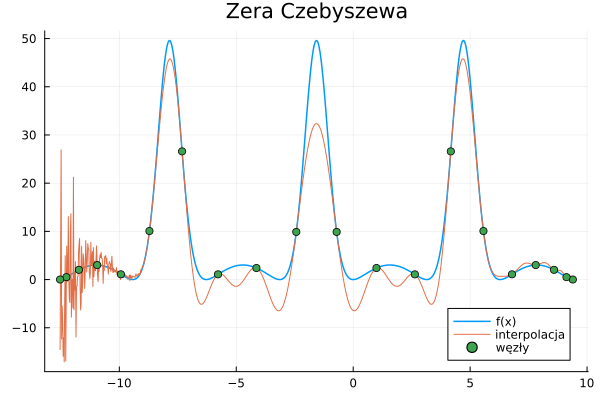

In [48]:
f = my_func
f′ = my_derivate
n = 20
X, intF = getCzebyszewZerosAndInterpolationPolynominal(A, B, f, f′, n) 
drawInterpolation(X, f, intF, "Zera Czebyszewa")
# savefig("plots/HerCzeZer$n")

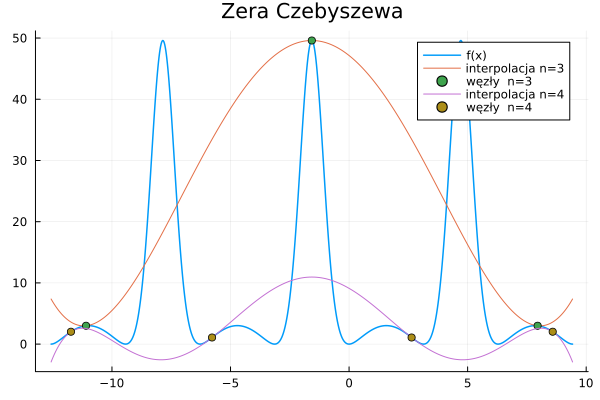

In [12]:
drawInterpolationN(my_func, my_derivate, [3, 4], A, B; title="Zera Czebyszewa")

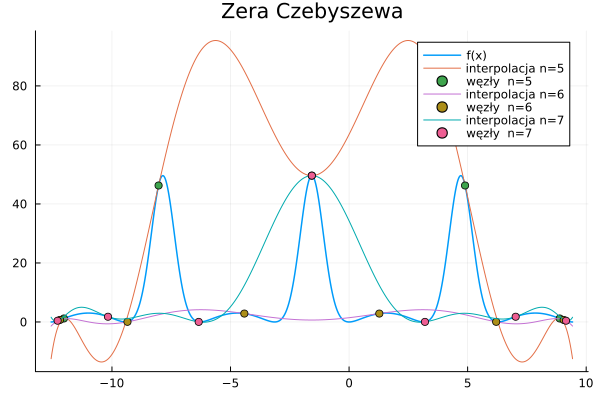

In [13]:
drawInterpolationN(my_func, my_derivate, [5, 6, 7], A, B; title="Zera Czebyszewa")

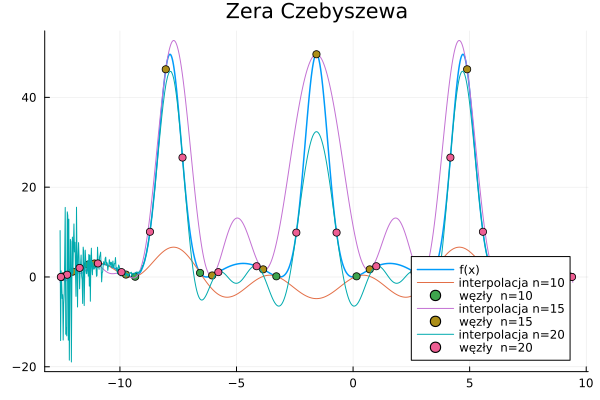

In [14]:
drawInterpolationN(my_func, my_derivate, [10, 15, 20], A, B, title=:"Zera Czebyszewa")

### Obliczanie dokładności

In [15]:
function maximalAmplitude(f1, f2, A, B, accurancy = 10e-5)
    X = A:(B-A)*accurancy:B
    return maximum(map((x)->abs(f1(x) - f2(x)), X))
end

function RMSamplitude(f1, f2, A, B, accurancy = 10e-5)
    X = A:(B-A)*accurancy:B
    return sqrt(sum((x)->(f1(x)- f2(x))^2,X) / length(X))
end

n = [3,4,5,6,7,8,9,10,11,12,15,20,30,40,45,50]

16-element Vector{Int64}:
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 15
 20
 30
 40
 45
 50

#### Równe odstępy

In [16]:
interpolationsEvenSpaces = [getEvenSpacesAndInterpolationPolynominal(A, B, my_func, my_derivate, i)[2] for i in n]
maxAes = [maximalAmplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]
rmsAes = [RMSamplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]


println("n:$n")
println("max:", round.(maxAes; digits=4))
println("max:", round.(rmsAes; digits=4))


n:[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 45, 50]


max:

[47.7511, 51.4251, 138.4756, 156.3474, 36.9274, 49.5982, 851.9598, 233.0786, 288.86, 5298.505, 99077.3556, 2.46860065562e7, 4.827636069477214e11, 2.4209294878588634e17, 7.132510498899952e20, 6.343353709270956e24]
max:[27.0919, 16.7406, 63.9833, 65.3035, 20.3444, 16.9837, 251.4455, 61.9038, 78.5535, 1283.9089, 20668.5404, 4.3054686202e6, 6.5528802558992e10, 1.092639228378039e16, 2.646652358703923e19, 2.0623211726559534e23]


#### Zera Czebyszewa

In [17]:
interpolationsEvenSpaces = [getCzebyszewZerosAndInterpolationPolynominal(A, B, my_func, my_derivate, i)[2] for i in n]
maxAcz = [maximalAmplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]
rmsAcz = [RMSamplitude(my_func, interpolationsEvenSpaces[i], A, B) for i in 1:length(n)]


println("n:$n")
println("max:", round.(maxAcz; digits=4))
println("max:", round.(rmsAcz; digits=4))

n:[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 45, 50]
max:[47.3691, 52.155, 94.1304, 48.9397, 46.688, 63.8029, 44.2932, 54.4159, 38.783, 34.1822, 24.9248, 36.1794, 8.5394400103542e9, 2.744841599868814e17, 2.361181878243346e21, 4.835703278458517e24]
max:[26.333, 16.5778, 53.6208, 16.0551, 18.5864, 22.4436, 18.9065, 16.1692, 13.2002, 11.5805, 9.0824, 4.2777, 2.939329717037e8, 1.1647982464232694e16, 6.141238069372038e19, 2.2318977712279438e23]


### Porównanie

In [18]:
# println("max amplitude")
pretty_table([n maxAcz maxAes]; backend = Val(:html), header=["n", "zera Czebyszewa", "Równe odstępy"], formatters = ft_printf("%10.2f", [2,3]))

n,zera Czebyszewa,Równe odstępy
3.0,47.37,47.75
4.0,52.16,51.43
5.0,94.13,138.48
6.0,48.94,156.35
7.0,46.69,36.93
8.0,63.80,49.60
9.0,44.29,851.96
10.0,54.42,233.08
11.0,38.78,288.86
12.0,34.18,5298.51


In [19]:
# println("rms amplitude")
pretty_table([n rmsAcz rmsAes]; backend = Val(:html), header=["n", "zera Czebyszewa", "Równe odstępy"], formatters = ft_printf("%10.2f", [2,3]))

n,zera Czebyszewa,Równe odstępy
3.0,26.33,27.09
4.0,16.58,16.74
5.0,53.62,63.98
6.0,16.06,65.30
7.0,18.59,20.34
8.0,22.44,16.98
9.0,18.91,251.45
10.0,16.17,61.90
11.0,13.20,78.55
12.0,11.58,1283.91


## Badanie funkcji kreujących

In [32]:
function creationFunctionMaksymalN(func, creationFunc, nodesFunc)
    n = 3
    flag=true
    while flag
        n += 1
        X, interpolationFunction = nodesFunc(A, B, func,my_derivate , n, creationFunc)
        for x in X
            if !(func(x) ≈ interpolationFunction(x))
                println("f(x)=$(func(x)), w(x)=$(interpolationFunction(x))")
                flag = false
                break
            end
        end
        if n == 1000
            println("more than 1000")
            return nothing
        end
    end
    println("found problem at n=$n")
    return n-1
end

function creationFunctionMaksymalNwithAtol(func, creationFunc, nodesFunc, atol)
    n = 3
    flag=true
    while flag
        n += 1
        X, interpolationFunction = nodesFunc(A, B, func,my_derivate, n, creationFunc)
        for x in X
            if !(isapprox(func(x), interpolationFunction(x); atol=atol))
                println("f(x)=$(func(x)), w(x)=$(interpolationFunction(x))")
                flag = false
                break
            end
        end
        if n == 1000
            println("more than 1000")
            return nothing
        end
    end
    println("found problem at n=$n")
    return n-1
end

creationFunctionMaksymalNwithAtol (generic function with 1 method)

#### metoda Hermit'a

In [36]:

println("Even Spaces:")
n1 = creationFunctionMaksymalNwithAtol(my_func, CreateInterpolationHermitePolynomial, getEvenSpacesAndInterpolationPolynominal, 1e-5)
println("Czebyszew Zeros:")
n2 = creationFunctionMaksymalNwithAtol(my_func, CreateInterpolationHermitePolynomial, getCzebyszewZerosAndInterpolationPolynominal, 1e-5)
# n = 359 countd after 6m 12s, czebyszew zeros
# n = 332 counted after 4m 25s, even spaces

Even Spaces:
f(x)=0.0, w(x)=-2.119503915309906e-5
found problem at n=12
Czebyszew Zeros:
f(x)=0.06251459537775106, w(x)=0.06252983976446558
found problem at n=12


11